In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from keras.preprocessing.image import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Resizing
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
print(tf. __version__)

2.8.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_gen = image_dataset_from_directory(directory="/content/drive/MyDrive/PlantDiseaseDataset/train",
                                         image_size=(256, 256))
test_gen = image_dataset_from_directory(directory="/content/drive/MyDrive/PlantDiseaseDataset/valid",
                                        image_size=(256, 256))

resize = Resizing(260,260)
train_gen = train_gen.map(lambda image,label:(resize(image),label))
test_gen  = test_gen.map(lambda image,label:(resize(image),label))

Found 39134 files belonging to 21 classes.
Found 9783 files belonging to 21 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetB2
efficientnet = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(260, 260, 3)) 

In [ ]:
model = keras.Sequential()

model.add(efficientnet)


# Add new layers
model.add(keras.layers.Flatten())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(21, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 9, 9, 1408)       7768569   
                                                                 
 flatten_1 (Flatten)         (None, 114048)            0         
                                                                 
 batch_normalization_1 (Batc  (None, 114048)           456192    
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 114048)            0         
                                                                 
 batch_normalization_2 (Batc  (None, 114048)           456192    
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 114048)           

# **Training the model**

The model has been trained by splitting the epochs into three different sets.

In [ ]:
ep = 1
history = model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

1223/1223 [==============================] - 19137s 16s/step - loss: 0.4477 - accuracy: 0.8718 - val_loss: 0.0649 - val_accuracy: 0.9804


In [ ]:
model.save('/content/drive/MyDrive/pd_h5/pd_effnetb2_1.h5')

In [ ]:
# If want to train more
model = keras.models.load_model('/content/drive/MyDrive/pd_h5/pd_effnetb2_1.h5')

# **2e - 2e**

In [ ]:
ep = 1
history = model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

1223/1223 [==============================] - 5528s 4s/step - loss: 0.0144 - accuracy: 0.9958 - val_loss: 0.0589 - val_accuracy: 0.9838


In [ ]:
model.save('/content/drive/My Drive/pd_h5/effnetb2_2.h5')

# **3e - 6e**

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/pd_h5/effnetb2_2.h5')

In [ ]:
ep = 4
history = model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/4
1223/1223 [==============================] - 864s 706ms/step - loss: 0.0949 - accuracy: 0.9743 - val_loss: 0.0717 - val_accuracy: 0.9863
Epoch 2/4
1223/1223 [==============================] - 869s 710ms/step - loss: 0.0605 - accuracy: 0.9853 - val_loss: 0.0505 - val_accuracy: 0.9911
Epoch 3/4
1223/1223 [==============================] - 869s 710ms/step - loss: 0.0510 - accuracy: 0.9882 - val_loss: 0.0395 - val_accuracy: 0.9934
Epoch 4/4
1223/1223 [==============================] - 869s 710ms/step - loss: 0.0440 - accuracy: 0.9909 - val_loss: 0.0365 - val_accuracy: 0.9941


In [ ]:
model.save('/content/drive/My Drive/pd_h5/effnetb2_6.h5')

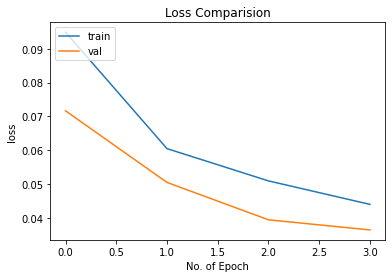

In [ ]:
# training and loss value
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Comparision')
plt.legend(['train','val'],loc='upper left')
plt.xlabel('No. of Epoch')
plt.ylabel('loss')
plt.show()

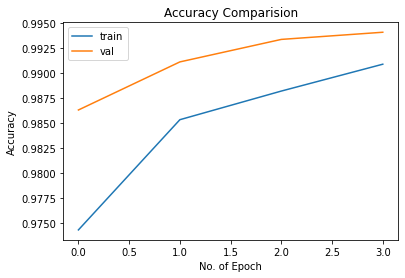

In [ ]:
# training and accuracy value
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Comparision')
plt.legend(['train','val'],loc='upper left')
plt.xlabel('No. of Epoch')
plt.ylabel('Accuracy')
plt.show()



# **Model Testing**

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/pd_h5/pd_effnetb2_6.h5')

In [ ]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 99.09 %
Test Accuracy   : 99.41 %
Precision Score : 99.41 %
Recall Score    : 99.41 %


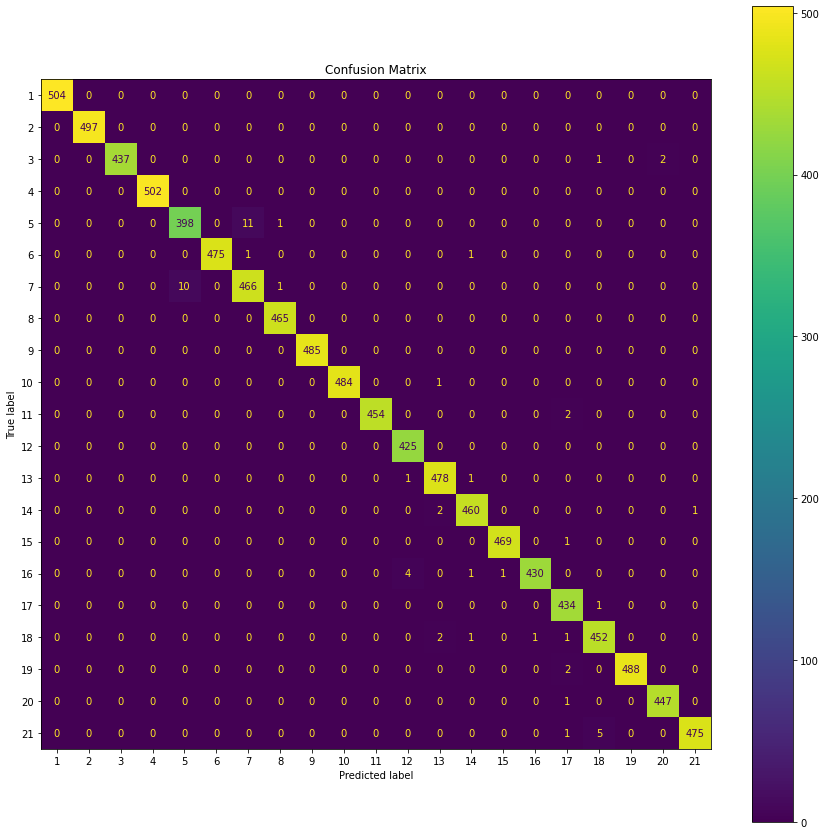

In [ ]:
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

# **Model Testing with images unkown to the model**

In [ ]:

test_gen_act = image_dataset_from_directory(directory="/content/drive/MyDrive/PlantDiseaseDataset/test_act",
                                        image_size=(256, 256))

# rescale = Rescaling(scale=1.0/255)

# test_gen_act  = test_gen_act.map(lambda image,label:(rescale(image),label))

resize = Resizing(260,260)
test_gen_act = test_gen_act.map(lambda image,label:(resize(image),label))
# test_gen  = test_gen.map(lambda image,label:(resize(image),label))

Found 33 files belonging to 21 classes.


In [ ]:
labels = []
predictions = []
for x,y in test_gen_act:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Test Accuracy   : 100.00 %
Precision Score : 100.00 %
Recall Score    : 100.00 %


## Model Testing with images taken by smartphone during this research.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
import numpy as np

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/pd_h5/pd_effnetb2_6.h5')

In [ ]:
# collecting names of images in the test folder
t_path = '/content/drive/MyDrive/PlantDiseaseDataset/self_tests'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(t_path) if isfile(join(t_path, f))]
from os import walk
t_img_names = next(walk(t_path), (None, None, []))[2]

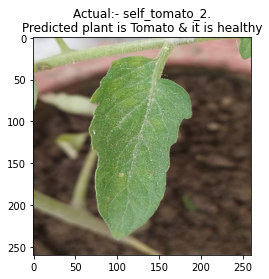

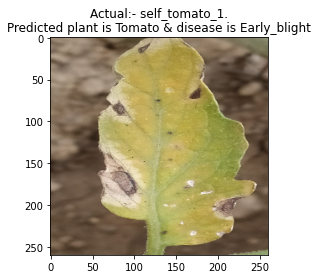

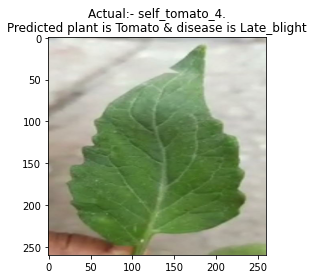

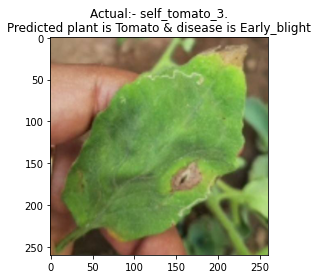

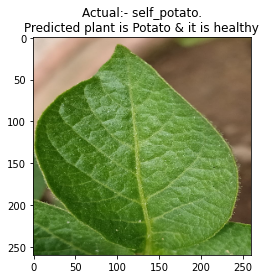

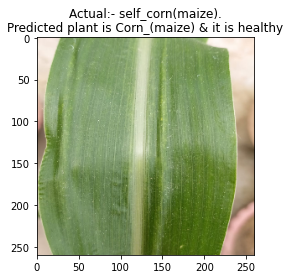

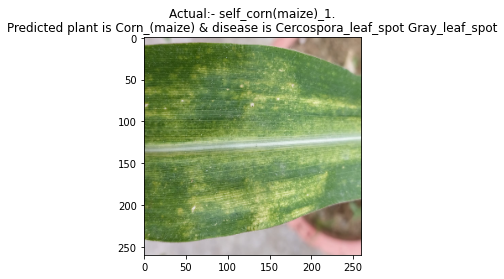

In [ ]:
n= len(t_img_names)
diseases=['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']
for i in range(n):
  # Read Image
  img = mpimg.imread(t_path+'/'+t_img_names[i])

  # bringing the image to format used for model training 
  img3 = cv2.resize(img,(260,260))
  img4 = np.reshape(img3,[1,260,260,3])
  
  # using the model to predict disease
  disease = np.argmax(model.predict(img4),axis=1)
  # disease is a list and at 0th index is the disease with highest probability 
  actual = 'Actual:- ' + t_img_names[i][:-4]
  # Splitting the predicted class to plant and disease name.
  plant, dis = diseases[disease[0]].split('___')
  if(dis.lower()=='healthy'):
    finalAnnot = actual + '\n'+"Predicted plant is "+plant+" & it is "+dis
  else:
    finalAnnot = actual + '\n'+"Predicted plant is "+plant+" & disease is "+dis
  # Setting up plt and showing the image used for prediction
  plt.title(finalAnnot)
  plt.imshow(img3)
  plt.show()
  if(i!=(n-1)):
    print('')

# Preparing script for Ml-Hub

In [ ]:
print(tf. __version__)
# Required tensorflow 2.8.0

2.8.0


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# from tensorflow import keras

  


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/pd_h5/effnetb2_6.h5')

In [ ]:
diseases=['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']
print(len(diseases))

21


Corn_(maize)___Common_rust


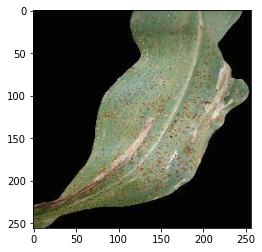

In [ ]:
# Read Images
img = mpimg.imread('/content/drive/MyDrive/PlantDiseaseDataset/test/CornCommonRust1.JPG')
img3 = cv2.resize(img,(256,256))
img4 = np.reshape(img3,[1,256,256,3])
img4 = img4/255
plt.imshow(img3)
disease = np.argmax(model.predict(img4),axis=1)
print(diseases[disease[0]])

Apple___Apple_scab


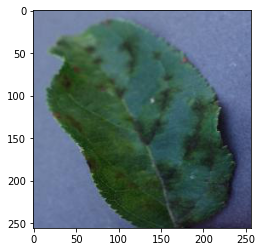

In [ ]:
# Read Images
img = mpimg.imread('/content/drive/MyDrive/PlantDiseaseDataset/test/AppleScab2.JPG')
img3 = cv2.resize(img,(256,256))
img4 = np.reshape(img3,[1,256,256,3])
img4 = img4/255
plt.imshow(img3)
disease = np.argmax(model.predict(img4),axis=1)
print(diseases[disease[0]])

Apple___Cedar_apple_rust


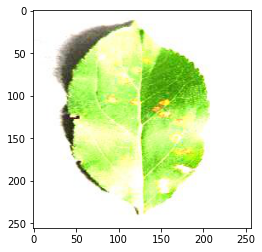

In [ ]:
# Read Images
img = mpimg.imread('/content/drive/MyDrive/PlantDiseaseDataset/test/AppleCedarRust1.JPG')
img3 = cv2.resize(img,(256,256))
img4 = np.reshape(img3,[1,256,256,3])
img4 = img4/255
plt.imshow(img3)
disease = np.argmax(model.predict(img4),axis=1)
print(diseases[disease[0]])

# Converting h5 to tflite for mobile use

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/pd_h5/pd_effnetb2_6.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("pd_tfl_ef_6.tflite", "wb").write(tflite_model)


INFO:tensorflow:Assets written to: /tmp/tmphmro9xu6/assets


82829488

***References***
<br>
1 https://github.com/spMohanty/PlantVillage-Dataset
<br>
2 https://keras.io/api/applications/densenet/#densenet201-function
<br>
3 https://www.kaggle.com/vishnu0399/leaf-disease-classification-cnn-96-accuracy
<br>
4 https://www.tensorflow.org/tutorials/images/transfer_learning
